ID: 20185163
Name: Hyogeon Jeon(전효건)

# Q4.

## (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [1]:
## useful packages
import numpy as np
import pandas as pd
import statsmodels.api as sm


In [ ]:
!pip install ISLP

In [2]:
## useful packages from ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec,
                         summarize,
                         Column,
                         Feature,
                         build_columns)

In [3]:
## load the data
Carseats = load_data('Carseats')

## building design matrix using ModelSpec
MS = ModelSpec(['Price', 'Urban', 'US'])
X = MS.fit_transform(Carseats)
y = Carseats['Sales']

## build a model and represent some values(t-statistic, p-value)
model = sm.OLS(y, X)
results1 = model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           2.39e-23
Time:                        23:50:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.0

Answer: Refer above result.

## (b)

Price: The p-value of price is nearby 0, thus we can reject the null hypothesis. As a result, the price
and Sales have a relationship. If Price is increasing, then Sales decrease as the coefficient of Price is
negative.

US: The p-value of US is nearby 0, thus we can reject the null hypothesis. As a result, US and Sales
have a relationship. If US is yes, then it ensures high sales as the coefficient of US is positive.

Urban: The p-value of Urban is big as well as 0.94, thus it does not have relationship with sales.

## (c)

Sales = 13.0435 + (−0.0545) ∗ P rice + (−0.0219) ∗ U rban + (1.2006) ∗ U S + ε

## (d)

From question (a), we can reject the null hypothesis in price and US.


## (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [4]:
## load the data
Carseats = load_data('Carseats')

## building design matrix using ModelSpec except 'Urban'
MS = ModelSpec(['Price', 'US'])
X = MS.fit_transform(Carseats)
#print(X)
y = Carseats['Sales']
#print(y)
## build a model and represent some values(t-statistic, p-value)
model = sm.OLS(y, X)
results2 = model.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           2.66e-24
Time:                        23:50:54   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.0

Answer: Refer above result.

## (f)

From the result of question (a) and question (e), they have same RSS(Residual
Sum of Squares) as 0.239. Therefore we can conclude that (e) is better than (a) because it has less
variable to predict.

## (g)

The true value of β ranges from ˆβ − 2SE( ˆβ) to ˆβ + 2SE( ˆβ) in 95% confidence intervals.
The estimated coefficient and standard error are from the results of question (e).
Intercept: [11.7688, 14.2928]
Price: [-0.0645, -0.0445]
US: [0.6836, 1.7156]

## (h) Is there evidence of outliers or high leverage observations in the model from (e)?

In [6]:
import matplotlib.pyplot as plt

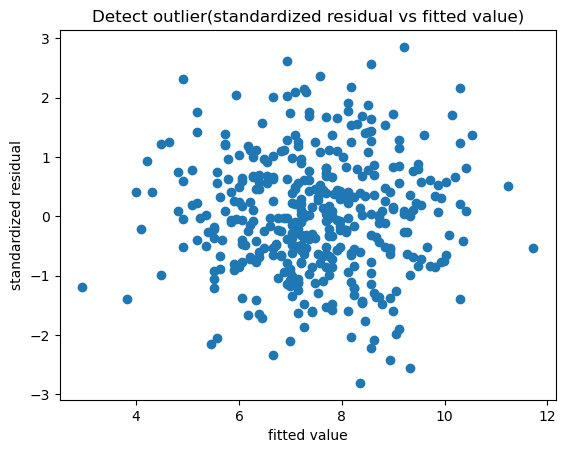

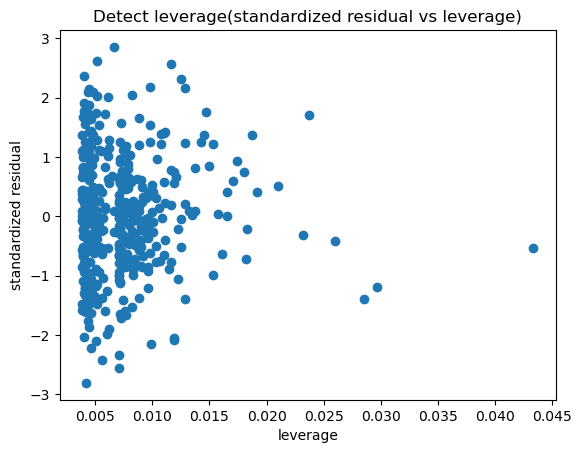

In [7]:
## Using statsmodel api to represent residual, fitted value, leverage
residuals = results2.resid
fitted_value = results2.fittedvalues
stand_resids = results2.resid_pearson
leverage = results2.get_influence().hat_matrix_diag

## standardized residual vs fitted value
plt.title('Detect outlier(standardized residual vs fitted value)')
plt.scatter(fitted_value, stand_resids)
plt.xlabel('fitted value')
plt.ylabel('standardized residual')
plt.show()

## standardized residual vs leverage
plt.title('Detect leverage(standardized residual vs leverage)')
plt.scatter(leverage, stand_resids)
plt.xlabel('leverage')
plt.ylabel('standardized residual')
plt.show()

From above first plot, some observations seems to be outlier. However, they are all between -3 to 3. Thus, there is no prominent outlier in model (e). From second plot, some points exceed (p+1)/n. Thus, there are some high leverages in model (e).

# Q5.

## (a)

The form of model: y = 2 + 2 ∗ x1 + 0.3 ∗ x2 + ε
Coefficients: 2, 2, 0.3

## (b)

In [8]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size = 100)
x2 = 0.5 * x1 + rng.normal(size = 100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size = 100)

In [9]:
np.corrcoef(x1,x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

The correlation coefficient between x1 and x2 is 0.772.

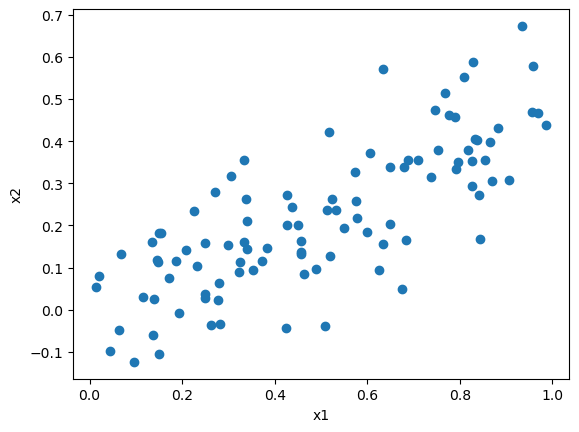

In [10]:
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## (c)

In [11]:
import csv

In [14]:
## making csv file about x1 and x2
x1x2 = open('x1x2.csv', 'w', newline='')
wr = csv.writer(x1x2)
wr.writerow(['x1', 'x2'])
for i in range(len(x1)):
    wr.writerow([x1[i], x2[i]])

## build a model same way in question 4
tem = pd.read_csv('x1x2.csv')
#print(tem)
MS = ModelSpec(['x1', 'x2'])
X = MS.fit_transform(tem)
#print(X)
#print(y)
model = sm.OLS(y, X)
result3 = model.fit()
print(result3.summary())

## If an error occurs, you have to wait some time and re-execute this cell.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           5.76e-08
Time:                        23:51:58   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.0

According to the above result, ˆβ0 = 1.9579, ˆβ1 = 1.6154, ˆβ2 = 0.9428. Fol-
lowing question (a), β0 = 2, β1 = 2, β2 = 0.3. Only β0 is similar to ˆβ0. As p-value of x1 is lower than
0.05, thus we can reject the null hypothesis. However, p-value of x2 is almost 0.259, thus we cannot
reject the null hypothesis.

## (d)

In [15]:
MS = ModelSpec(['x1'])
X = MS.fit_transform(tem)
#print(X)
#print(y)
model = sm.OLS(y, X)
result3 = model.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.37e-08
Time:                        23:52:00   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.0

According to the above result, the p-value
of x1 is nearby 0, thus we can reject the null hypothesis.

## (e)

In [16]:
MS = ModelSpec(['x2'])
X = MS.fit_transform(tem)
#print(X)
#print(y)
model = sm.OLS(y, X)
results3 = model.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           7.43e-07
Time:                        23:52:03   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.0

According to the above results, the p-value of x2 is nearby 0, thus we can reject the null hypothesis

## (f)

From model (c), since the p-value of x2 is almost 0.26, we cannot reject the null hypothesis
H0 : β2 = 0. We concluded there is no correlation between y and x2. Nevertheless, we concluded
that there is some valid relationship between y and x1 in model (d). Also, there is some valid rela-
tionship between y and x2 in model (e). It seems to be contradiction because the result from model
(c) violates the first result from model (c). However, all of the results do not contradict each other.
We call this phenomenon ’collinearity’ which some predictors are highly correlated. Because there
is highly correlated between x1 and x2, it is difficult to separate the respective effects of x1 and x2
on the response.

## (g)

In [17]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size = 100)
x2 = 0.5 * x1 + rng.normal(size = 100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size = 100)
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])


In [ ]:
## re-fit (c)

In [23]:
## making csv file about new x1 and x2
x1x2_new = open('x1x2_new.csv', 'w', newline='')
wr = csv.writer(x1x2_new)
wr.writerow(['x1', 'x2'])
for i in range(len(x1)):
    wr.writerow([x1[i], x2[i]])
## re-fit question (c)
tem = pd.read_csv('x1x2_new.csv')
#print(tem)
MS = ModelSpec(['x1', 'x2'])
X = MS.fit_transform(tem)
#print(X)
#print(y)
model = sm.OLS(y, X)
results4 = model.fit()
print(results4.summary())
## If an error occurs, you have to wait some time and re-execute this cell.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           4.60e-08
Time:                        23:52:33   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.0

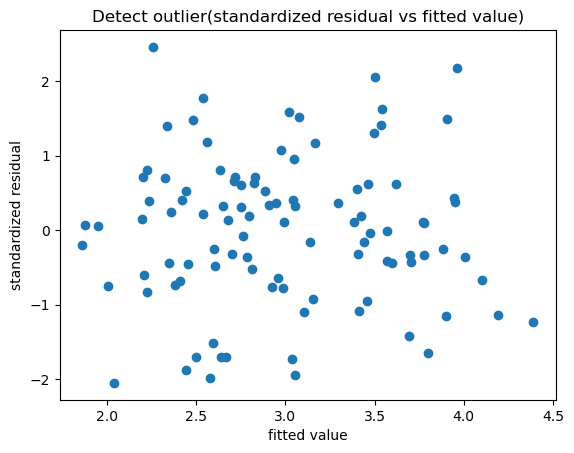

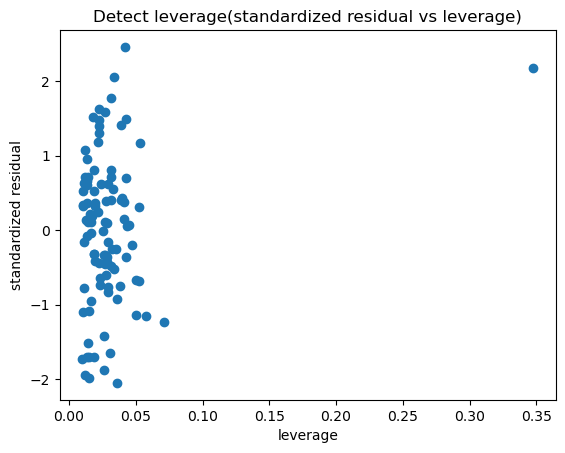

In [24]:
## Using statsmodel api to represent residual, fitted value, leverage
result = results4
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
leverage = result.get_influence().hat_matrix_diag

## standardized residual vs fitted value
plt.title('Detect outlier(standardized residual vs fitted value)')
plt.scatter(fitted_value, stand_resids)
plt.xlabel('fitted value')
plt.ylabel('standardized residual')
plt.show()

## standardized residual vs leverage
plt.title('Detect leverage(standardized residual vs leverage)')
plt.scatter(leverage, stand_resids)
plt.xlabel('leverage')
plt.ylabel('standardized residual')
plt.show()

From above first plot, some observations seems to be outlier. However, they are all between -3 to 3. Thus, there is no prominent outlier in this model. From second plot, one point exceed (p+1)/n. Thus, there is a high leverage in this model.

In [25]:
## re-fit question (d)

MS = ModelSpec(['x1'])
X = MS.fit_transform(tem)
#print(X)
#print(y)
model = sm.OLS(y, X)
results5 = model.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           9.23e-07
Time:                        23:52:40   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.0

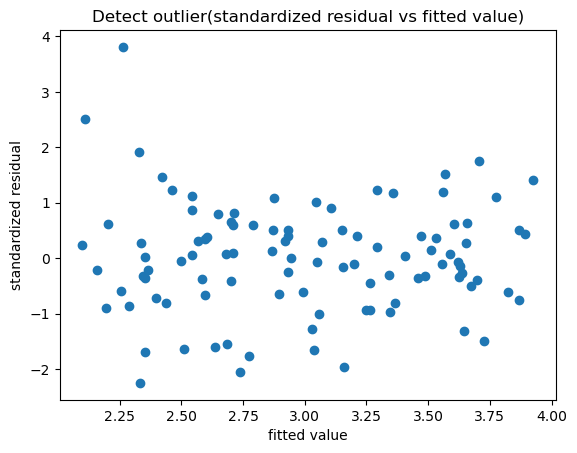

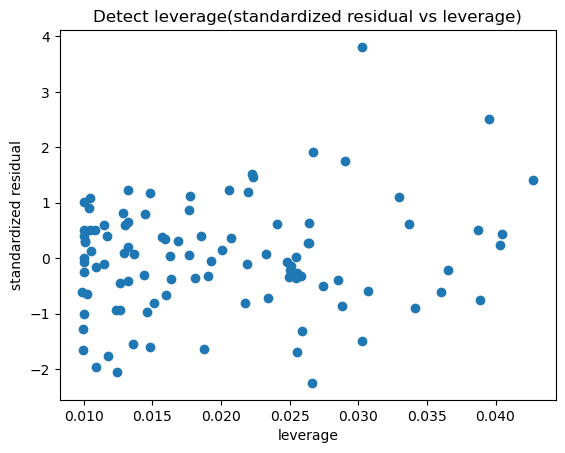

In [26]:
## Using statsmodel api to represent residual, fitted value, leverage
result = results5
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
leverage = result.get_influence().hat_matrix_diag

## standardized residual vs fitted value
plt.title('Detect outlier(standardized residual vs fitted value)')
plt.scatter(fitted_value, stand_resids)
plt.xlabel('fitted value')
plt.ylabel('standardized residual')
plt.show()

## standardized residual vs leverage
plt.title('Detect leverage(standardized residual vs leverage)')
plt.scatter(leverage, stand_resids)
plt.xlabel('leverage')
plt.ylabel('standardized residual')
plt.show()

From above first plot, there is a point exceed 3. Thus, there is a outlier in this model. From second plot, all points are bounded in(p+1)/n. Thus, there is no high leverage in this model.

In [27]:
## re-fit question (e)

MS = ModelSpec(['x2'])
X = MS.fit_transform(tem)
#print(X)
#print(y)
model = sm.OLS(y, X)
results6 = model.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           3.13e-08
Time:                        23:52:46   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.0

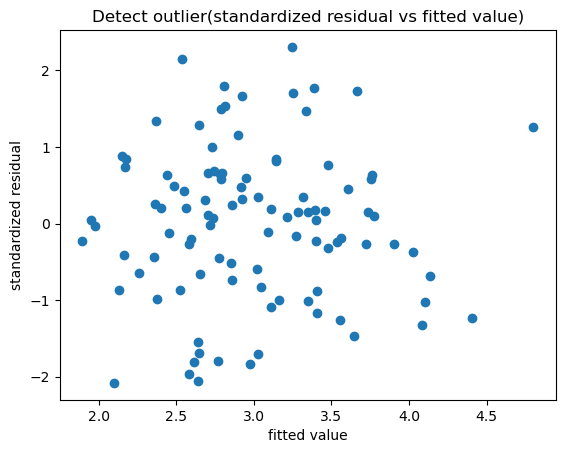

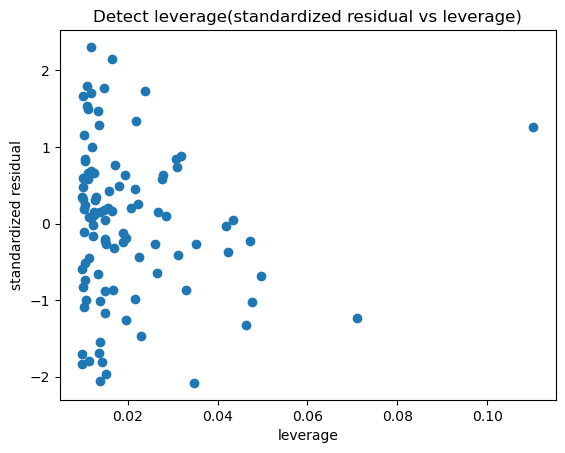

In [28]:
## Using statsmodel api to represent residual, fitted value, leverage
result = results6
residuals = result.resid
fitted_value = result.fittedvalues
stand_resids = result.resid_pearson
leverage = result.get_influence().hat_matrix_diag

## standardized residual vs fitted value
plt.title('Detect outlier(standardized residual vs fitted value)')
plt.scatter(fitted_value, stand_resids)
plt.xlabel('fitted value')
plt.ylabel('standardized residual')
plt.show()

## standardized residual vs leverage
plt.title('Detect leverage(standardized residual vs leverage)')
plt.scatter(leverage, stand_resids)
plt.xlabel('leverage')
plt.ylabel('standardized residual')
plt.show()

From above first plot, some observations seems to be outlier. However, they are all between -3 to 3. Thus, there is no prominent outlier in model (e). From second plot, one point exceed (p+1)/n. Thus, there is a high leverage in this model.

# Q9.

## (a)

In [29]:
Weekly = load_data('Weekly')
## Some statistic results
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [30]:
## Correlation matrix
Weekly.corr()

/var/folders/nl/dgt8hdmn7_v0m0qwx5kv3sx40000gn/T/ipykernel_4142/3737451953.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Weekly.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<Axes: >

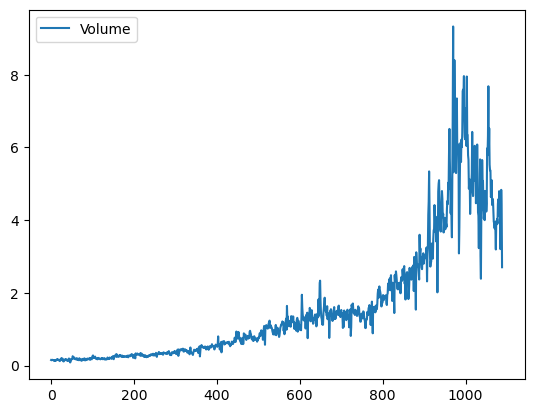

In [31]:
## Plot that Volume versus index
Weekly.plot(y='Volume')

Volume and year are highly correlated because it has 0.8419, which is higher than others.

## (b)

In [32]:
from ISLP.models import (ModelSpec as MS, \
    summarize)

In [33]:
## Using library to fit a logistic regression
allvars = Weekly.columns.drop(['Direction', 'Year', 'Today'])
design = MS(allvars)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'
glm = sm.GLM(y, X, family=sm.families.Binomial())   
# third parameter => logistic regressioin

results7 = glm.fit()
print(results7.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Sun, 24 Sep 2023   Deviance:                       1486.4
Time:                        23:52:58   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.0

According to the above result, the p-value of Lag2 is lower than 0.05. Thus, Lag2 has a correlation with Direction.

## (c)

In [34]:
from ISLP import confusion_table

In [35]:
## Using library to make a confusion matrix
probs = results7.predict()
labels = np.array(['Down']*len(probs))
labels[probs > 0.5] = "Up"
confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


The model shows (54+557)/(54+48+430+557) = 56.1% of correct predictions. From the above result, there are two types of error. False down error which is up examples that are classified as down and false up error which is down examples that are classified as up.

## (d)

In [36]:
## Dataset from 1990 to 2008: training dataset
Weekly_train = Weekly.loc[(Weekly.Year >= 1990) & (Weekly.Year <= 2008), ]

## Test dataset
Weekly_test = Weekly.loc[(Weekly.Year >= 2009) & (Weekly.Year <= 2010), ]




In [37]:
allvars = Weekly_train.columns.drop(['Direction', 'Today', 'Year',\
                               'Volume', 'Lag1', 'Lag3',\
                                'Lag4', 'Lag5'])
design = MS(allvars)
X_train = design.fit_transform(Weekly_train)
X_test = design.fit_transform(Weekly_test)
y = Weekly_train.Direction == 'Up'
y_test = Weekly_test.Direction == 'Up'

In [38]:
glm = sm.GLM(y, X_train, family=sm.families.Binomial())
results8 = glm.fit()
print(results8.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Sun, 24 Sep 2023   Deviance:                       1350.5
Time:                        23:53:05   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2033      0.064      3.162      0.0

In [39]:
probs = results8.predict(X_test)
labels = np.array(['Down']*len(probs))
labels[probs > 0.5] = "Up"
confusion_table(labels, Weekly_test.Direction)


Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


Fraction of correct predictions: (9+56)/(9+5+34+56) = 62.5%

## (e)

In [40]:
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)

In [41]:
lda = LDA(store_covariance=True)
results9 = lda.fit(X_train, y)
probs = results9.predict(X_test)
labels = np.array(['Down']*len(probs))
labels[probs > 0.5] = "Up"
confusion_table(labels, Weekly_test.Direction)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


Fraction of correct predictions: (9+56)/(9+5+34+56) = 62.5%

## (f)

In [42]:
qda = QDA(store_covariance=True)
results10 = qda.fit(X_train, y)
probs = results10.predict(X_test)
labels = np.array(['Up']*len(probs))
labels[probs > 0.5] = "Down"
confusion_table(labels, Weekly_test.Direction)

/Users/jeonhyogeon/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/jeonhyogeon/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/jeonhyogeon/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/jeonhyogeon/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


Fraction of correct predictions: (61)/(43+61) = 58.7%

## (g)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,21,30
True,22,31


Fraction of correct predictions: (21+31)/(21+30+22+31) = 50%

## (h)

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
NB = GaussianNB()
NB.fit(X_train, y)
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, y_test)

Truth,False,True
Predicted,,
False,0,0
True,43,61


Fraction of correct predictions: (61)/(43+61) = 58.7%

## (i)

According to all previous results, logistic regression and LDA are the best models.